In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
data=pd.read_csv("/content/electricity_bill_dataset.csv")
data

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [4]:
label_encoder = LabelEncoder()
data['City_encoded'] = label_encoder.fit_transform(data['City'])
data= data.drop(columns=['City'])

In [5]:
data['Company_encoded'] = label_encoder.fit_transform(data['Company'])
data= data.drop(columns=['Company'])

In [7]:
inertias = []
K_range = range(1, 20)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

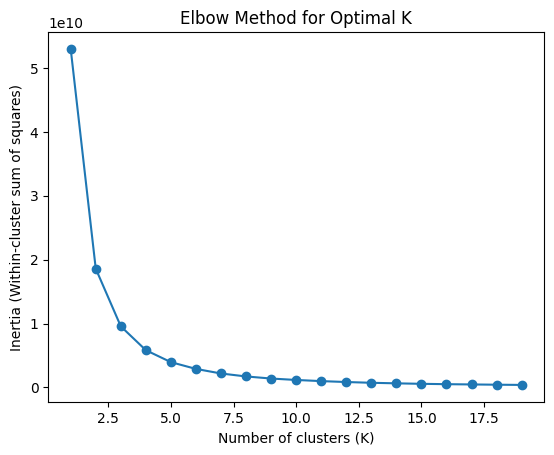

In [8]:
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.show()


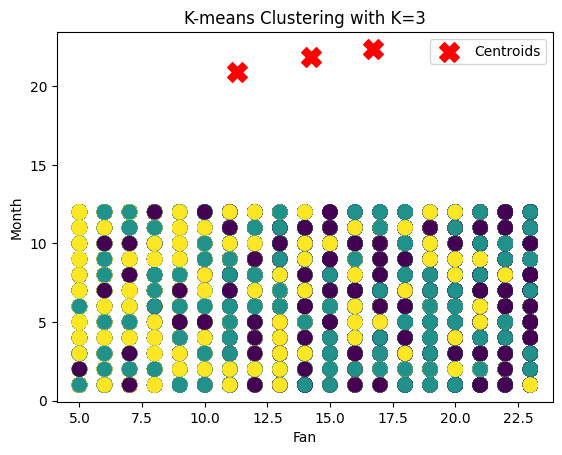

In [11]:

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(data)

centroids = kmeans.cluster_centers_


labels = kmeans.labels_

# Step 5: Visualize the clusters
plt.scatter(data['Fan'], data['Month'], c=labels, cmap='viridis', s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-means Clustering with K={optimal_k}')
plt.xlabel('Fan')
plt.ylabel('Month')
plt.legend()
plt.show()
